# EDISS Winter School Hackathon 2024

## Team 8 (alphabetical)

*   Nicolas Restrepo Torres
*   Somoy Barua
*   Thinakone Lougandy
*   Umar Faruk Abdullahi
*   Vinay Sanga
*   Zeynep Yaradanakul


This notebook focuses on the modelling section of the choosen approach. We focused on using the vehicle and emotional data captured from the subjects to try to answer the question: "Given only the vehicular and emotional state of a driver, can we assess the risk accurately?"


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
sim = pd.read_excel('/content/Feature_Simulation.xlsx')

In [ ]:
sim = sim.drop('Unnamed: 0', axis=1)

In [ ]:
sim['subject']

0       0AC2A4
1       0AC2A4
2       0AC2A4
3       0AC2A4
4       0AC2A4
         ...  
1282    F9D528
1283    F9D528
1284    F9D528
1285    F9D528
1286    F9D528
Name: subject, Length: 1287, dtype: object

In [ ]:
track = pd.read_excel('/content/Feature_Track.xlsx')

In [ ]:
track = track.drop('Unnamed: 0', axis=1)

In [ ]:
track['subject']

0       0AC2A4
1       0AC2A4
2       0AC2A4
3       0AC2A4
4       0AC2A4
         ...  
1051    8924EA
1052    8924EA
1053    8924EA
1054    8924EA
1055    8924EA
Name: subject, Length: 1056, dtype: object

In [ ]:
track_set = set(list(track['subject']))

In [ ]:
len(track_set)

16

In [ ]:
sim_set = set(list(sim['subject']))

In [ ]:
len(sim_set)

19

In [ ]:
diff = sim_set - track_set

In [ ]:
additonal_subjects = list(diff)

In [ ]:
sim

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,13,1,0,0,1,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0AC2A4,1,32,0,1,0,1,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0AC2A4,1,36,0,0,1,1,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,0AC2A4,1,42,1,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,0AC2A4,1,52,1,0,0,0,0,1,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,F9D528,6,110,0,1,0,1,0,0,0,...,0.09533,0.12060,0.09136,0.11785,0.05030,0.04819,0.06937,0.08329,0.03837,0.02643
1283,F9D528,6,122,0,0,1,1,0,0,0,...,0.10137,0.12266,0.07359,0.09279,0.06202,0.04435,0.07684,0.06629,0.05423,0.03049
1284,F9D528,6,125,0,0,0,0,1,0,0,...,0.11645,0.13272,0.09911,0.13874,0.05765,0.05772,0.07704,0.09484,0.04535,0.03515
1285,F9D528,6,141,1,0,0,1,0,0,0,...,0.08964,0.09620,0.07806,0.08509,0.04293,0.04075,0.05465,0.05843,0.03598,0.02968


In [ ]:
sim = sim[sim['subject'] != '45792B']

In [ ]:
sim

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,13,1,0,0,1,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0AC2A4,1,32,0,1,0,1,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0AC2A4,1,36,0,0,1,1,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,0AC2A4,1,42,1,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,0AC2A4,1,52,1,0,0,0,0,1,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,F9D528,6,110,0,1,0,1,0,0,0,...,0.09533,0.12060,0.09136,0.11785,0.05030,0.04819,0.06937,0.08329,0.03837,0.02643
1283,F9D528,6,122,0,0,1,1,0,0,0,...,0.10137,0.12266,0.07359,0.09279,0.06202,0.04435,0.07684,0.06629,0.05423,0.03049
1284,F9D528,6,125,0,0,0,0,1,0,0,...,0.11645,0.13272,0.09911,0.13874,0.05765,0.05772,0.07704,0.09484,0.04535,0.03515
1285,F9D528,6,141,1,0,0,1,0,0,0,...,0.08964,0.09620,0.07806,0.08509,0.04293,0.04075,0.05465,0.05843,0.03598,0.02968


In [ ]:
track_cleaned = track.dropna()

In [ ]:
track_cleaned

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
1,0AC2A4,1,27,1,0,1,0,1,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,0AC2A4,1,33,1,0,0,1,1,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,0AC2A4,1,43,1,1,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,0AC2A4,1,58,1,1,0,0,0,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762
5,0AC2A4,1,100,1,0,0,0,0,1,0,...,0.25684,0.14480,0.14691,0.13539,0.03894,0.02784,0.04989,0.04311,0.03223,0.01851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,8924EA,7,34,0,0,1,1,0,0,0,...,0.12229,0.09790,0.09598,0.06669,0.01560,0.01280,0.02259,0.01996,0.01113,0.00853
1048,8924EA,7,39,1,0,0,0,0,0,0,...,0.07144,0.06057,0.04700,0.04750,0.01564,0.01582,0.02689,0.02627,0.00868,0.00944
1049,8924EA,7,57,1,0,0,0,0,1,0,...,0.08088,0.07371,0.04604,0.04563,0.01604,0.01400,0.02659,0.02390,0.00948,0.00785
1050,8924EA,7,99,0,0,0,0,1,0,0,...,0.10211,0.09497,0.04877,0.06143,0.01402,0.01226,0.02569,0.02228,0.00680,0.00593


In [ ]:
sim_cleaned = sim.dropna()

In [ ]:
sim_cleaned

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,13,1,0,0,1,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0AC2A4,1,32,0,1,0,1,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0AC2A4,1,36,0,0,1,1,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,0AC2A4,1,42,1,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,0AC2A4,1,52,1,0,0,0,0,1,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,F9D528,6,100,0,0,0,0,1,0,0,...,0.10007,0.09835,0.08577,0.11099,0.04406,0.04851,0.05862,0.07710,0.03492,0.03088
1282,F9D528,6,110,0,1,0,1,0,0,0,...,0.09533,0.12060,0.09136,0.11785,0.05030,0.04819,0.06937,0.08329,0.03837,0.02643
1283,F9D528,6,122,0,0,1,1,0,0,0,...,0.10137,0.12266,0.07359,0.09279,0.06202,0.04435,0.07684,0.06629,0.05423,0.03049
1284,F9D528,6,125,0,0,0,0,1,0,0,...,0.11645,0.13272,0.09911,0.13874,0.05765,0.05772,0.07704,0.09484,0.04535,0.03515


In [ ]:
sim_cleaned.dtypes

subject               object
lap                    int64
start_time             int64
straight               int64
roundabout_entry       int64
                      ...   
BetaParietal         float64
LowerBetaFrontal     float64
LowerBetaParietal    float64
UpperBetaFrontal     float64
UpperBetaParietal    float64
Length: 88, dtype: object

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
sim_cleaned.drop(['subject', 'lap', 'start_time'], axis=1, inplace=True)

<ipython-input-34-3eff11a6af02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_cleaned.drop(['subject', 'lap', 'start_time'], axis=1, inplace=True)


In [ ]:
sim_cleaned

,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,traffic_light,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,1,0,0,1,0,0,0,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0,1,0,1,0,0,0,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0,0,1,1,0,0,0,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,1,0,0,0,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,1,0,0,0,0,1,0,0,0,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0,0,0,0,1,0,0,1,0,0,...,0.10007,0.09835,0.08577,0.11099,0.04406,0.04851,0.05862,0.07710,0.03492,0.03088
1282,0,1,0,1,0,0,0,0,0,0,...,0.09533,0.12060,0.09136,0.11785,0.05030,0.04819,0.06937,0.08329,0.03837,0.02643
1283,0,0,1,1,0,0,0,0,0,0,...,0.10137,0.12266,0.07359,0.09279,0.06202,0.04435,0.07684,0.06629,0.05423,0.03049
1284,0,0,0,0,1,0,0,0,0,0,...,0.11645,0.13272,0.09911,0.13874,0.05765,0.05772,0.07704,0.09484,0.04535,0.03515


In [ ]:
columns_to_drop = [
'subject',
'lap',
'start_time',
'hurry',
'frustration',
'surprise',
'risk_outcome',
'risk_source_env',
'risk_source_other_usr',
'risk_source_driver',
'risk_source_crash',
'risk_evaluation',
'emotion_na'
'emotion_neutral',
'emotion_surprise',
'emotion_anger',
'emotion_boredom',
'emotion_fear',
'emotion_fun',
'gaze_na',
'gaze_complete_expl',
'gaze_partial_expl',
'gaze_poor_expl',
'distraction_na',
'distraction_no',
'distraction_reduced_attention',
'distraction_speaking'
]

In [ ]:
track_cleaned.drop(['subject', 'lap', 'start_time'], axis=1, inplace=True)

<ipython-input-36-559482e0afcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_cleaned.drop(['subject', 'lap', 'start_time'], axis=1, inplace=True)


In [ ]:
track_cleaned

,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,traffic_light,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
1,1,0,1,0,1,0,0,0,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,1,0,0,1,1,0,0,0,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,1,1,0,0,0,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,1,1,0,0,0,0,0,1,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762
5,1,0,0,0,0,1,0,0,0,0,...,0.25684,0.14480,0.14691,0.13539,0.03894,0.02784,0.04989,0.04311,0.03223,0.01851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,0,1,1,0,0,0,0,0,0,...,0.12229,0.09790,0.09598,0.06669,0.01560,0.01280,0.02259,0.01996,0.01113,0.00853
1048,1,0,0,0,0,0,0,0,0,0,...,0.07144,0.06057,0.04700,0.04750,0.01564,0.01582,0.02689,0.02627,0.00868,0.00944
1049,1,0,0,0,0,1,0,0,0,0,...,0.08088,0.07371,0.04604,0.04563,0.01604,0.01400,0.02659,0.02390,0.00948,0.00785
1050,0,0,0,0,1,0,0,0,0,0,...,0.10211,0.09497,0.04877,0.06143,0.01402,0.01226,0.02569,0.02228,0.00680,0.00593


In [ ]:
statistic, p_value = mannwhitneyu(track_cleaned, sim_cleaned)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

In [ ]:
p_value

array([1.59461285e-015, 1.95338472e-002, 7.82284988e-001, 3.65348826e-005,
       2.06231452e-004, 2.51448228e-009, 2.76527183e-008, 2.44987004e-001,
       4.66437799e-001, 7.16727678e-004, 1.71015397e-003, 8.60168719e-001,
       4.04131889e-002, 1.08269673e-019, 1.65260573e-002, 2.24081837e-003,
       6.09856989e-001, 3.17501087e-001, 9.86368012e-048, 2.32101201e-001,
       1.43099737e-001, 1.44156302e-019, 1.00000000e+000, 4.96927007e-020,
       5.81270175e-019, 2.55328693e-021, 1.72102487e-001, 9.07191483e-002,
       1.76244070e-001, 7.46737660e-004, 2.37323088e-001, 2.67294567e-015,
       1.55015219e-013, 8.10556858e-001, 2.32101201e-001, 1.00000000e+000,
       1.10248587e-002, 6.40930027e-001, 1.32186849e-220, 3.01686123e-222,
       2.32101201e-001, 3.98627813e-001, 2.36054821e-016, 2.78639321e-009,
       7.69844842e-001, 9.55569125e-001, 1.00085390e-038, 7.29070957e-025,
       2.59185283e-025, 2.59085141e-003, 5.05185799e-003, 1.84546623e-018,
       1.86883230e-199, 1

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the distributions.")

In [ ]:
columns = list(track_cleaned.columns)

In [ ]:
import matplotlib.pyplot as plt

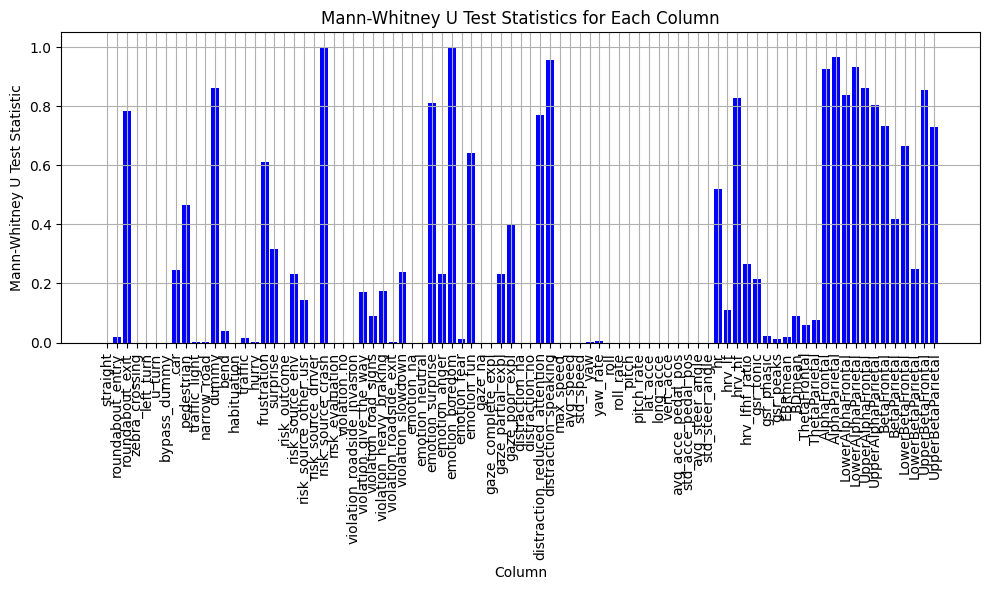

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(columns)), p_value, color='blue')
plt.xlabel('Column')
plt.ylabel('Mann-Whitney U Test Statistic')
plt.title('Mann-Whitney U Test Statistics for Each Column')
plt.xticks(range(len(columns)), columns, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
track_cleaned

,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,traffic_light,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
1,1,0,1,0,1,0,0,0,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,1,0,0,1,1,0,0,0,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,1,1,0,0,0,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,1,1,0,0,0,0,0,1,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762
5,1,0,0,0,0,1,0,0,0,0,...,0.25684,0.14480,0.14691,0.13539,0.03894,0.02784,0.04989,0.04311,0.03223,0.01851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,0,1,1,0,0,0,0,0,0,...,0.12229,0.09790,0.09598,0.06669,0.01560,0.01280,0.02259,0.01996,0.01113,0.00853
1048,1,0,0,0,0,0,0,0,0,0,...,0.07144,0.06057,0.04700,0.04750,0.01564,0.01582,0.02689,0.02627,0.00868,0.00944
1049,1,0,0,0,0,1,0,0,0,0,...,0.08088,0.07371,0.04604,0.04563,0.01604,0.01400,0.02659,0.02390,0.00948,0.00785
1050,0,0,0,0,1,0,0,0,0,0,...,0.10211,0.09497,0.04877,0.06143,0.01402,0.01226,0.02569,0.02228,0.00680,0.00593


In [ ]:
track_selected = track_cleaned.drop(['risk_outcome',
       'risk_source_env', 'risk_source_other_usr', 'risk_source_driver',
       'risk_source_crash', 'violation_no',
       'violation_roadside_invasion', 'violation_give_the_way',
       'violation_road_signs', 'violation_heavy_braking',
       'violation_roadside_exit', 'violation_slowdown','hr', 'hrv_lf', 'hrv_hf',
       'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic', 'gsr_peaks', 'EBRmean',
       'BDmean', 'ThetaFrontal', 'ThetaParietal', 'AlphaFrontal',
       'AlphaParietal', 'LowerAlphaFrontal', 'LowerAlphaParietal',
       'UpperAlphaFrontal', 'UpperAlphaParietal', 'BetaFrontal',
       'BetaParietal', 'LowerBetaFrontal', 'LowerBetaParietal',
       'UpperBetaFrontal', 'UpperBetaParietal'], axis=1)

In [ ]:
sim_selected = sim_cleaned.drop(['risk_outcome',
       'risk_source_env', 'risk_source_other_usr', 'risk_source_driver',
       'risk_source_crash', 'violation_no',
       'violation_roadside_invasion', 'violation_give_the_way',
       'violation_road_signs', 'violation_heavy_braking',
       'violation_roadside_exit', 'violation_slowdown','hr', 'hrv_lf', 'hrv_hf',
       'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic', 'gsr_peaks', 'EBRmean',
       'BDmean', 'ThetaFrontal', 'ThetaParietal', 'AlphaFrontal',
       'AlphaParietal', 'LowerAlphaFrontal', 'LowerAlphaParietal',
       'UpperAlphaFrontal', 'UpperAlphaParietal', 'BetaFrontal',
       'BetaParietal', 'LowerBetaFrontal', 'LowerBetaParietal',
       'UpperBetaFrontal', 'UpperBetaParietal'], axis=1)

In [ ]:
columns = sim_selected.columns

In [ ]:
statistic, p_value = mannwhitneyu(track_selected, sim_selected)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U statistic: [379783.5 330234.  316818.  282162.  340560.  343598.5 299534.  319587.5
 312411.  300198.  322008.5 315368.  316443.  243580.  296901.  337184.
 318007.5 309885.  266672.5 287188.  346507.  314765.5 314363.5 315034.5
 312015.  315971.5  63074.  568001.5 314363.5 314699.  285175.  344431.5
 314833.  315229.  195330.5 220334.  219423.  342741.5 289248.  395660.
  37911.  256064.   22423.5 254876.5 378694.  630069.  217763.5 184646.
 348979.  135947. ]
P-value: [1.59461285e-015 1.95338472e-002 7.82284988e-001 3.65348826e-005
 2.06231452e-004 2.51448228e-009 2.76527183e-008 2.44987004e-001
 4.66437799e-001 7.16727678e-004 1.71015397e-003 8.60168719e-001
 4.04131889e-002 1.08269673e-019 1.65260573e-002 2.24081837e-003
 6.09856989e-001 3.17501087e-001 4.96927007e-020 2.67294567e-015
 1.55015219e-013 8.10556858e-001 2.32101201e-001 1.00000000e+000
 1.10248587e-002 6.40930027e-001 1.32186849e-220 3.01686123e-222
 2.32101201e-001 3.98627813e-001 2.36054821e-016 2.7863

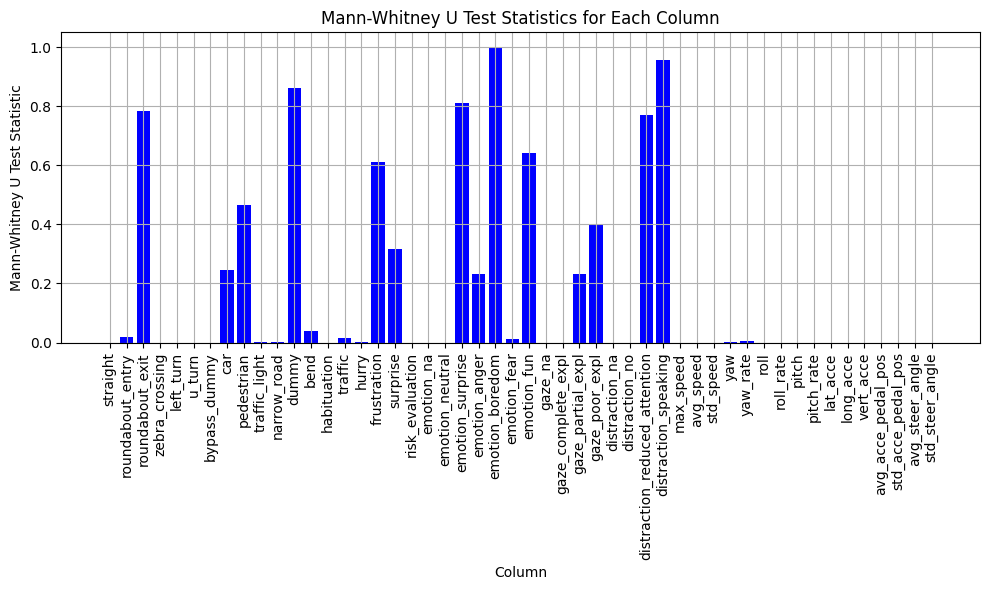

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(columns)), p_value, color='blue')
plt.xlabel('Column')
plt.ylabel('Mann-Whitney U Test Statistic')
plt.title('Mann-Whitney U Test Statistics for Each Column')
plt.xticks(range(len(columns)), columns, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

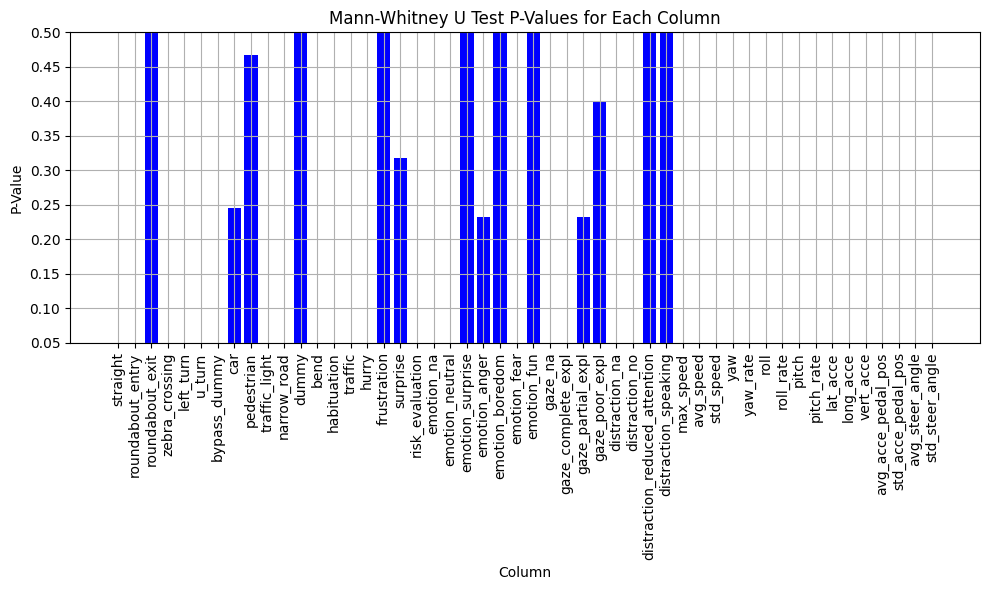

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(columns)), p_value, color='blue')
plt.xlabel('Column')
plt.ylabel('P-Value')
plt.title('Mann-Whitney U Test P-Values for Each Column')
plt.xticks(range(len(columns)), columns, rotation=90)
plt.ylim(0.05, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.concat([track_selected, sim_selected], axis=0)

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = df.drop('risk_evaluation', axis=1)
y = df['risk_evaluation']

y_replaced = y.replace(2, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_replaced,test_size=0.2,random_state=123)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

scaler_standard = StandardScaler()

df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(X[numerical_columns]), columns=numerical_columns)
df_scaled_standard


,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,traffic_light,...,roll_rate,pitch,pitch_rate,lat_acce,long_acce,vert_acce,avg_acce_pedal_pos,std_acce_pedal_pos,avg_steer_angle,std_steer_angle
0,0.20,-0.52,1.96,-1.03,1.74,-0.33,-0.18,-0.26,-0.24,-0.30,...,-0.81,-0.19,-0.70,-0.14,-0.52,1.21,-1.35,-1.51,0.04,-0.48
1,0.20,-0.52,-0.51,0.98,1.74,-0.33,-0.18,-0.26,-0.24,-0.30,...,-0.88,-0.04,-0.79,0.58,0.18,1.21,-0.78,-1.01,0.71,0.13
2,0.20,1.93,-0.51,-1.03,-0.57,-0.33,-0.18,-0.26,-0.24,-0.30,...,-0.86,-0.17,-0.80,-0.26,0.50,1.20,-0.39,-0.67,-0.05,-0.62
3,0.20,1.93,-0.51,-1.03,-0.57,-0.33,-0.18,3.81,-0.24,-0.30,...,-0.88,-0.18,-0.73,-0.10,0.15,1.21,-0.58,-0.08,0.03,0.20
4,0.20,-0.52,-0.51,-1.03,-0.57,2.99,-0.18,-0.26,-0.24,-0.30,...,-0.96,-0.26,-0.88,-0.07,0.21,1.22,-0.70,-0.82,0.16,-0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-0.55,-0.52,-0.51,-1.03,1.74,-0.33,-0.18,3.81,-0.24,-0.30,...,2.03,0.03,0.42,-0.55,-0.23,-0.85,-0.08,-0.03,-0.51,-0.27
1606,-0.55,1.93,-0.51,0.98,-0.57,-0.33,-0.18,-0.26,-0.24,-0.30,...,0.01,0.66,-0.51,0.23,0.42,-0.85,-0.62,-0.66,0.62,0.07
1607,-0.55,-0.52,1.96,0.98,-0.57,-0.33,-0.18,-0.26,-0.24,-0.30,...,-0.96,-0.03,0.48,1.23,-0.16,-0.84,0.46,-0.44,2.68,-0.52
1608,-0.55,-0.52,-0.51,-1.03,1.74,-0.33,-0.18,-0.26,-0.24,-0.30,...,0.12,0.51,0.13,-0.15,-0.29,-0.85,-0.32,-0.16,0.35,0.07


In [ ]:
!pip install lazypredict

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:04<00:00,  4.50it/s]

[LightGBM] [Info] Number of positive: 167, number of negative: 1121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4163
[LightGBM] [Info] Number of data points in the train set: 1288, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.129658 -> initscore=-1.903983
[LightGBM] [Info] Start training from score -1.903983


100%|██████████| 29/29 [00:04<00:00,  6.05it/s]


In [ ]:
model_objects = clf.provide_models(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
evaluation_results = {}

for model_name, model in model_objects.items():
    print(f"Evaluating {model_name}...")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'roc_auc': roc_auc
    }

Evaluating AdaBoostClassifier...
Evaluating BaggingClassifier...
Evaluating BernoulliNB...
Evaluating CalibratedClassifierCV...
Evaluating DecisionTreeClassifier...
Evaluating DummyClassifier...
Evaluating ExtraTreeClassifier...
Evaluating ExtraTreesClassifier...
Evaluating GaussianNB...
Evaluating KNeighborsClassifier...
Evaluating LabelPropagation...
Evaluating LabelSpreading...
Evaluating LinearDiscriminantAnalysis...
Evaluating LinearSVC...
Evaluating LogisticRegression...
Evaluating NearestCentroid...
Evaluating PassiveAggressiveClassifier...
Evaluating Perceptron...
Evaluating QuadraticDiscriminantAnalysis...
Evaluating RandomForestClassifier...
Evaluating RidgeClassifier...
Evaluating RidgeClassifierCV...
Evaluating SGDClassifier...
Evaluating SVC...
Evaluating XGBClassifier...
Evaluating LGBMClassifier...


In [ ]:
evaluation_results

{'AdaBoostClassifier': {'accuracy': 0.8509316770186336,
  'precision': 0.8143356669763088,
  'recall': 0.8509316770186336,
  'f1': 0.8308687464177518,
  'confusion_matrix': array([[271,  16],
         [ 32,   3]]),
  'roc_auc': 0.5149825783972125},
 'BaggingClassifier': {'accuracy': 0.8913043478260869,
  'precision': 0.8599498327759196,
  'recall': 0.8913043478260869,
  'f1': 0.8633793843200827,
  'confusion_matrix': array([[282,   5],
         [ 30,   5]]),
  'roc_auc': 0.5627177700348431},
 'BernoulliNB': {'accuracy': 0.7267080745341615,
  'precision': 0.8245704605953054,
  'recall': 0.7267080745341615,
  'f1': 0.767162471395881,
  'confusion_matrix': array([[222,  65],
         [ 23,  12]]),
  'roc_auc': 0.5581881533101046},
 'CalibratedClassifierCV': {'accuracy': 0.8850931677018633,
  'precision': 0.8231815695925623,
  'recall': 0.8850931677018633,
  'f1': 0.8423689617365506,
  'confusion_matrix': array([[284,   3],
         [ 34,   1]]),
  'roc_auc': 0.5090592334494772},
 'Decisio

In [ ]:
random_forest = model_objects['RandomForestClassifier']

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
import seaborn as sns

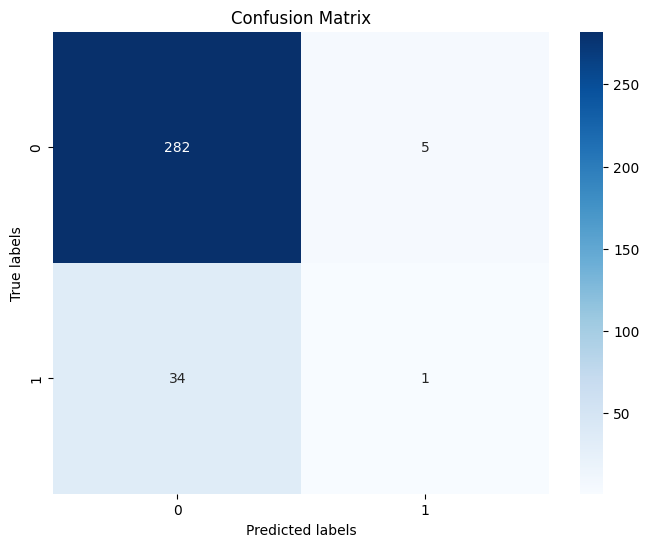

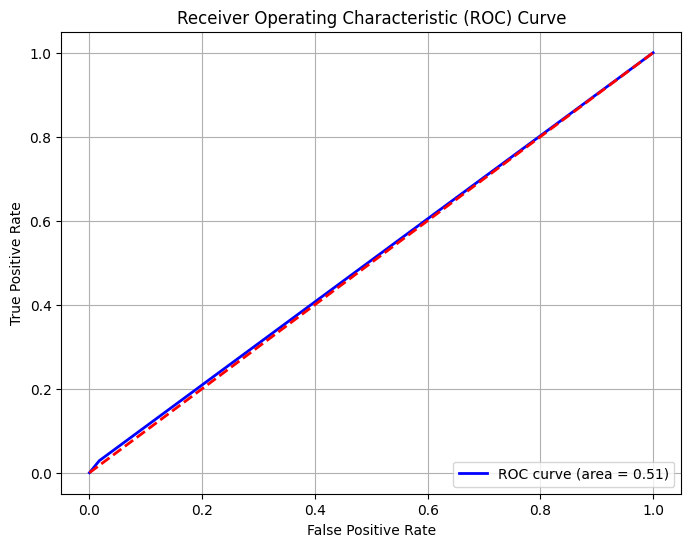

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
y_train.shape

(1288,)

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_true, y_pred)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

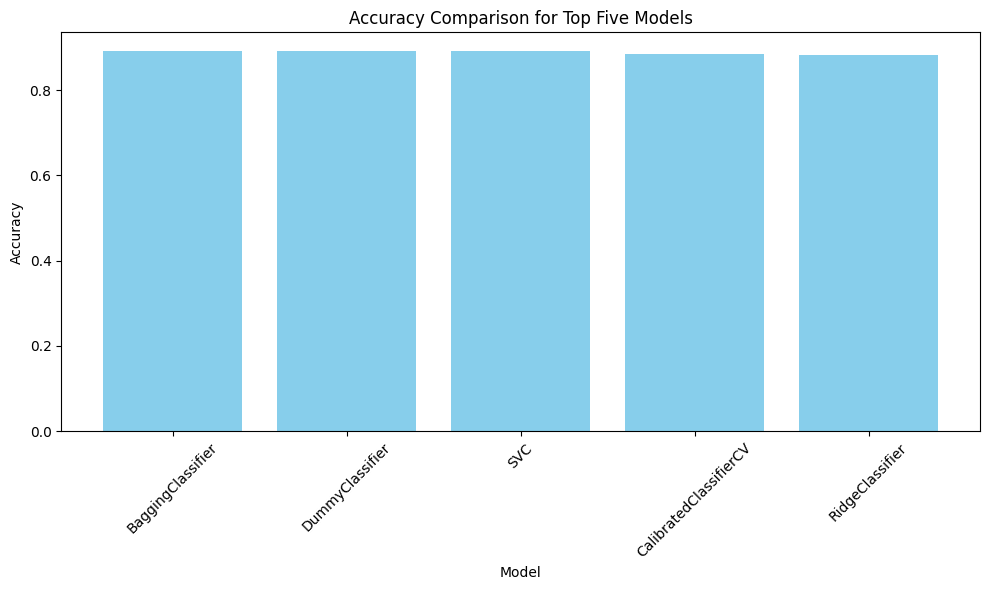

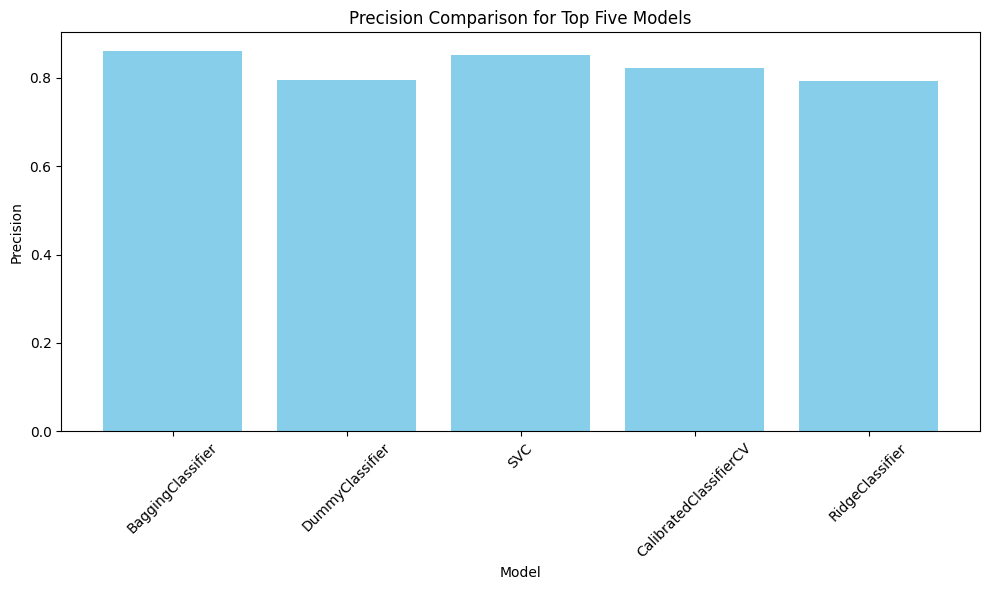

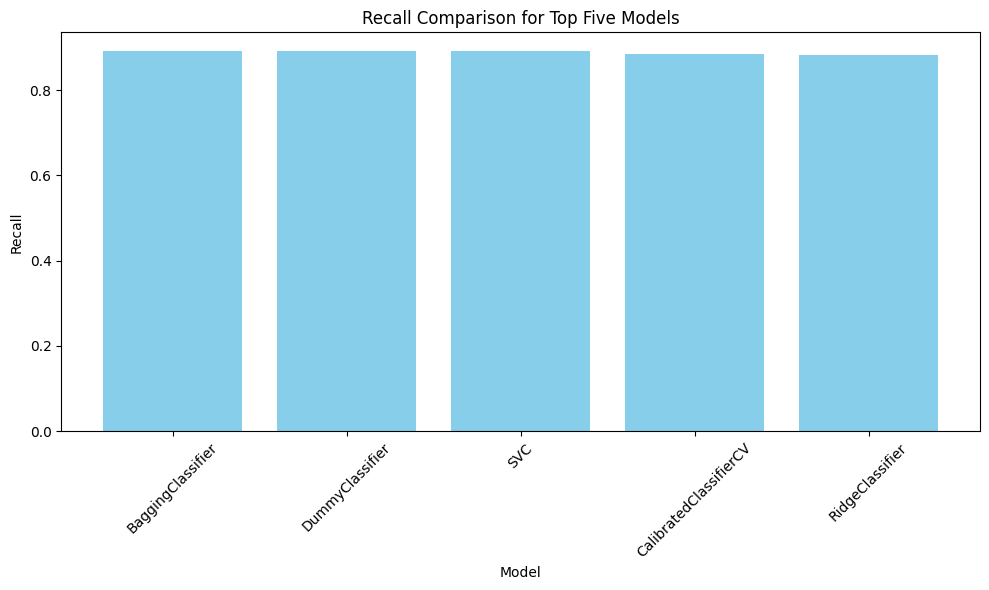

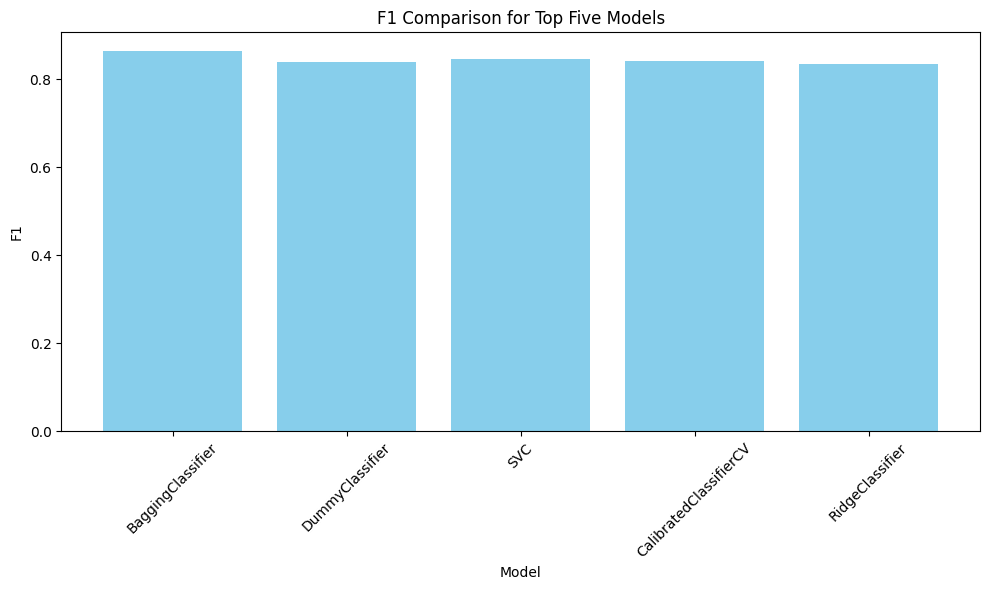

In [ ]:
# Sort the dictionary based on accuracy in descending order
sorted_results = dict(sorted(evaluation_results.items(), key=lambda item: item[1]['accuracy'], reverse=True))

# Select top five models
top_five_models = list(sorted_results.keys())[:5]

# Define metrics to plot
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']

# Create a bar chart for each metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.title(f'{metric.capitalize()} Comparison for Top Five Models')

    # Extract metric values for the top five models
    metric_values = [sorted_results[model][metric] for model in top_five_models]

    # Create bar chart
    x = np.arange(len(top_five_models))
    plt.bar(x, metric_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(x, top_five_models, rotation=45)
    plt.tight_layout()
    plt.show()

IndexError: invalid index to scalar variable.

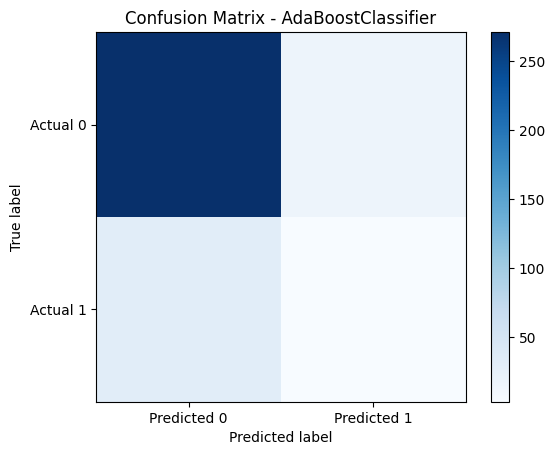

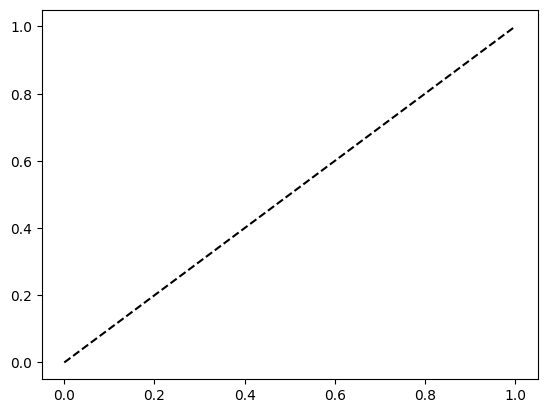

In [ ]:
            fig, ax = plt.subplots()
            sns.heatmap(metrics['confusion_matrix'], annot=True, cmap='Blues', fmt='g', ax=ax)
            ax.set_xlabel('Predicted labels')
            ax.set_ylabel('True labels')
            ax.set_title('Confusion Matrix')
            st.pyplot(fig)

            # Plot ROC curve
            num_classes = metrics['confusion_matrix'].shape[0]
            if num_classes == 2:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)
                fig, ax = plt.subplots()
                ax.plot(fpr, tpr, marker='.')
                ax.plot([0, 1], [0, 1], linestyle='--')
                ax.set_xlabel('False Positive Rate')
                ax.set_ylabel('True Positive Rate')
                ax.set_title('ROC Curve')
                st.pyplot(fig)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variables, respectively
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=123)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

ValueError: Unknown label type: 'continuous'